In [20]:
from pandas import read_csv
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import tensorflow as tf
from keras.layers.recurrent import LSTM
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D,Dropout,Input,Activation,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_iris
from numpy import unique
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from matplotlib import pyplot as plt

In [21]:
df = pd.read_csv(
    '../input/full-scale-waste-water-treatment-plant-data/Data-Melbourne_F_fixed.csv', index_col = 'Unnamed: 0')

In [22]:
df

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed,Year,Month,Day
0,2.941,2.589,175856.0,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5,2014.0,1.0,1.0
1,2.936,2.961,181624.0,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8,2014.0,1.0,2.0
2,2.928,3.225,202016.0,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1,2014.0,1.0,5.0
3,2.928,3.354,207547.0,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9,2014.0,1.0,6.0
4,2.917,3.794,202824.0,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2,2014.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5.068,4.716,305938.0,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2,2019.0,6.0,20.0
1378,5.882,5.510,293446.0,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9,2019.0,6.0,24.0
1379,4.638,4.811,307968.0,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9,2019.0,6.0,25.0
1380,5.373,4.929,316675.0,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2,2019.0,6.0,26.0


In [23]:
df=df.drop(['Year', 'Day', 'Month'], axis=1)

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1381
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Average Outflow           1382 non-null   float64
 1   Average Inflow            1382 non-null   float64
 2   Energy Consumption        1382 non-null   float64
 3   Ammonia                   1382 non-null   float64
 4   Biological Oxygen Demand  1382 non-null   float64
 5   Chemical Oxygen Demand    1382 non-null   float64
 6   Total Nitrogen            1382 non-null   float64
 7   Average Temperature       1382 non-null   float64
 8   Maximum temperature       1382 non-null   float64
 9   Minimum temperature       1382 non-null   float64
 10  Atmospheric pressure      1382 non-null   float64
 11  Average humidity          1382 non-null   float64
 12  Total rainfall            1382 non-null   float64
 13  Average visibility        1382 non-null   float64
 14  Average 

In [25]:
df.describe()

,Average Outflow,Average Inflow,Energy Consumption,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,3.930608,4.506338,275159.089001,39.222302,382.061708,845.960434,62.740752,15.036686,20.530897,10.037337,3.675036,63.558611,0.218090,9.101592,19.482706,35.381259
std,1.228778,1.439583,44640.533689,7.761598,85.996012,145.416540,3.571035,5.398491,7.096760,4.656887,61.010416,14.534205,1.306923,16.322905,7.136868,11.626362
min,0.000004,2.589000,116638.000000,13.000000,140.000000,360.000000,40.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.074500,3.643250,246435.750000,34.000000,330.000000,751.250000,61.396000,10.800000,15.000000,6.800000,0.000000,55.000000,0.000000,8.400000,14.400000,27.800000
50%,3.701000,4.161500,275808.000000,39.000000,360.000000,845.000000,62.957500,14.300000,19.200000,9.600000,0.000000,66.000000,0.000000,10.000000,18.100000,33.500000
75%,4.498750,4.847750,305703.750000,44.000000,422.980000,920.000000,64.366000,18.575000,25.200000,13.000000,0.000000,74.000000,0.000000,10.000000,23.300000,42.400000
max,7.920000,18.968000,398328.000000,93.000000,850.000000,1700.000000,92.000000,35.500000,43.500000,28.500000,1022.000000,97.000000,18.030000,512.000000,49.100000,83.500000


In [26]:
df.isnull().sum()

Average Outflow             0
Average Inflow              0
Energy Consumption          0
Ammonia                     0
Biological Oxygen Demand    0
Chemical Oxygen Demand      0
Total Nitrogen              0
Average Temperature         0
Maximum temperature         0
Minimum temperature         0
Atmospheric pressure        0
Average humidity            0
Total rainfall              0
Average visibility          0
Average wind speed          0
Maximum wind speed          0
dtype: int64

In [27]:
X = df.drop('Energy Consumption', axis = 1)
y = df['Energy Consumption']

In [28]:
X

,Average Outflow,Average Inflow,Ammonia,Biological Oxygen Demand,Chemical Oxygen Demand,Total Nitrogen,Average Temperature,Maximum temperature,Minimum temperature,Atmospheric pressure,Average humidity,Total rainfall,Average visibility,Average wind speed,Maximum wind speed
0,2.941,2.589,27.0,365.0,730.0,60.378,19.3,25.1,12.6,0.0,56.0,1.52,10.0,26.9,53.5
1,2.936,2.961,25.0,370.0,740.0,60.026,17.1,23.6,12.3,0.0,63.0,0.00,10.0,14.4,27.8
2,2.928,3.225,42.0,418.0,836.0,64.522,16.8,27.2,8.8,0.0,47.0,0.25,10.0,31.9,61.1
3,2.928,3.354,36.0,430.0,850.0,63.000,14.6,19.9,11.1,0.0,49.0,0.00,10.0,27.0,38.9
4,2.917,3.794,46.0,508.0,1016.0,65.590,13.4,19.1,8.0,0.0,65.0,0.00,10.0,20.6,35.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1377,5.068,4.716,28.0,310.0,660.0,58.807,6.8,10.0,4.0,0.0,56.0,0.00,10.0,14.4,22.2
1378,5.882,5.510,40.0,250.0,700.0,60.671,7.6,16.0,3.0,0.0,71.0,0.00,0.0,13.5,25.9
1379,4.638,4.811,47.0,260.0,860.0,64.000,9.7,16.0,3.0,0.0,65.0,0.00,10.0,18.1,25.9
1380,5.373,4.929,46.0,300.0,900.0,62.479,10.9,17.0,5.0,0.0,65.0,0.00,10.0,21.9,35.2


In [29]:
y

0       175856.0
1       181624.0
2       202016.0
3       207547.0
4       202824.0
          ...   
1377    305938.0
1378    293446.0
1379    307968.0
1380    316675.0
1381    318268.0
Name: Energy Consumption, Length: 1382, dtype: float64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [31]:
X_train.shape

(1105, 15)

In [32]:
scaler = StandardScaler()

In [33]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
X_train

array([[ 1.11865137, -0.02292582, -0.9637957 , ..., -0.52020782,
         3.1515705 ,  1.54020553],
       [-0.22156805, -0.33471701, -0.43931151, ...,  0.03961302,
         0.35896975,  0.28737519],
       [-0.70273404,  0.21634002,  0.47853581, ...,  0.03961302,
        -1.24081159, -1.14565677],
       ...,
       [ 1.94247801,  2.2897514 ,  0.34741477, ...,  0.03961302,
        -0.4970536 , -0.66511911],
       [-0.75397302, -0.73191187,  1.00302   , ...,  0.03961302,
        -0.4970536 , -0.03012291],
       [ 0.56302874,  0.19600581,  1.00302   , ...,  0.03961302,
        -0.18832387, -0.82815867]])

In [35]:
y_train.shape

(1105,)

In [36]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [37]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [38]:
model1 = Sequential()
model1.add(LSTM(units = 128, input_shape= (15,1)))
model1.add(Dropout(0.1))
model1.add(Dense(60, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(20, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(units = 1))
model1.summary()
msle = MeanSquaredLogarithmicError()
model1.compile(
    loss=msle, 
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[msle]
)
history = model1.fit(
   X_train, 
    y_train, 
    epochs=700, 
   batch_size=1000,
    validation_split=0.2
)

2022-12-20 20:32:20.155599: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:32:20.156535: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:32:20.157261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:32:20.158001: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:32:20.158739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 60)                7740      
_________________________________________________________________
dropout_1 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_2 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

2022-12-20 20:32:20.974760: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1/1 [==============================] - 4s 4s/step - loss: 156.3308 - mean_squared_logarithmic_error: 156.3308 - val_loss: 89.1117 - val_mean_squared_logarithmic_error: 89.1117
Epoch 2/700
1/1 [==============================] - 0s 102ms/step - loss: 88.1985 - mean_squared_logarithmic_error: 88.1985 - val_loss: 47.2042 - val_mean_squared_logarithmic_error: 47.2042
Epoch 3/700
1/1 [==============================] - 0s 100ms/step - loss: 47.3207 - mean_squared_logarithmic_error: 47.3207 - val_loss: 33.9050 - val_mean_squared_logarithmic_error: 33.9050
Epoch 4/700
1/1 [==============================] - 0s 99ms/step - loss: 34.0752 - mean_squared_logarithmic_error: 34.0752 - val_loss: 26.7171 - val_mean_squared_logarithmic_error: 26.7171
Epoch 5/700
1/1 [==============================] - 0s 100ms/step - loss: 26.8651 - mean_squared_logarithmic_error: 26.8651 - val_loss: 21.7294 - val_mean_squared_logarithmic_error: 21.7294
Epoch 6/700
1/1 [==============================] - 0s 122ms/step - lo

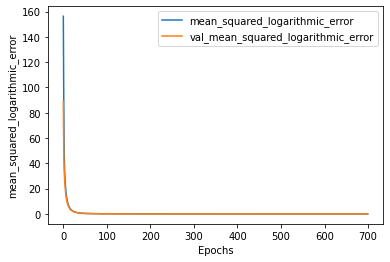

In [39]:
def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [40]:
predictions = model1.predict(X_test[:1])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:1])

Predicted values are:  [[272803.62]]
Real values are:  839    287772.0
Name: Energy Consumption, dtype: float64


In [41]:
model1.save('Energy Consumption.h5')

In [42]:
X = df.drop('Chemical Oxygen Demand', axis = 1)
y = df['Chemical Oxygen Demand']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [44]:
scaler = StandardScaler()

In [45]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [47]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [48]:
model2 = Sequential()
model2.add(LSTM(units = 128, input_shape= (15,1)))
model2.add(Dropout(0.1))
model2.add(Dense(60, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(20, activation='relu'))
model2.add(Dropout(0.1))
model2.add(Dense(units = 1))
model2.summary()
msle = MeanSquaredLogarithmicError()
model2.compile(
    loss=msle, 
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[msle]
)
history = model2.fit(
   X_train, 
    y_train, 
    epochs=700, 
   batch_size=1000,
    validation_split=0.2
)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 60)                7740      
_________________________________________________________________
dropout_4 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_5 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

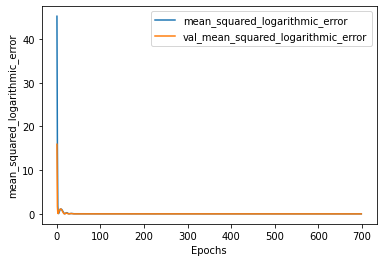

In [49]:

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [50]:
predictions = model2.predict(X_test[:1])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:1])

Predicted values are:  [[766.12616]]
Real values are:  839    490.0
Name: Chemical Oxygen Demand, dtype: float64


In [51]:
model2.save('Chemical Oxygen Demand.h5')

In [52]:
X = df.drop('Biological Oxygen Demand', axis = 1)
y = df['Biological Oxygen Demand']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [54]:
scaler = StandardScaler()

In [55]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [56]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1105, 15, 1)

In [57]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(277, 15, 1)

In [58]:
model3 = Sequential()
model3.add(LSTM(units = 128, input_shape= (15,1)))
model3.add(Dropout(0.1))
model3.add(Dense(60, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(20, activation='relu'))
model3.add(Dropout(0.1))
model3.add(Dense(units = 1))
model3.summary()
msle = MeanSquaredLogarithmicError()
model3.compile(
    loss=msle, 
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
    metrics=[msle]
)
history = model3.fit(
   X_train, 
    y_train, 
    epochs=700, 
   batch_size=1000,
    validation_split=0.2
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 60)                7740      
_________________________________________________________________
dropout_7 (Dropout)          (None, 60)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 20)                1220      
_________________________________________________________________
dropout_8 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

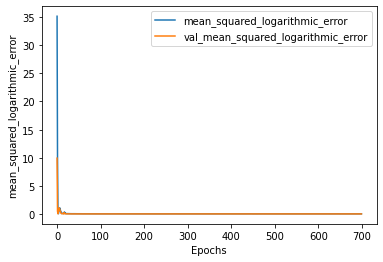

In [59]:

def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_squared_logarithmic_error')

In [60]:
predictions = model3.predict(X_test[:1])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:1])

Predicted values are:  [[363.7158]]
Real values are:  839    200.0
Name: Biological Oxygen Demand, dtype: float64


In [61]:
model3.save('Biological Oxygen Demand.h5')

In [63]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/Energy Consumption.h5',compile=False)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Energy Consumption.tflite", "wb").write(tflite_model)

2022-12-20 20:53:11.247142: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.
2022-12-20 20:53:13.565466: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:13.566089: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:13.566747: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2022-12-20 20:53:13.566871: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-12-20 20:53:13.567365: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had ne

325316

In [64]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/Chemical Oxygen Demand.h5',compile=False)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Biological Oxygen Demand.tflite", "wb").write(tflite_model)

2022-12-20 20:53:20.237944: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:20.238603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:20.239225: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2022-12-20 20:53:20.239338: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-12-20 20:53:20.239788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:20.240261: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

325460

In [65]:
import tensorflow as tf
model = tf.keras.models.load_model('/kaggle/working/Biological Oxygen Demand.h5',compile=False)
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
open("Chemical Oxygen Demand.tflite", "wb").write(tflite_model)

2022-12-20 20:53:23.182375: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:23.183008: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:23.183715: I tensorflow/core/grappler/devices.cc:66] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 2
2022-12-20 20:53:23.183846: I tensorflow/core/grappler/clusters/single_machine.cc:357] Starting new session
2022-12-20 20:53:23.184256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-20 20:53:23.184785: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] su

325460